In [2]:
import pandas as pd

# load the training dataset
#!wget https://raw.githubusercontent.com/MicrosoftDocs/ml-basics/refs/heads/master/challenges/data/wine.csv
data = pd.read_csv('wine.csv')

In [3]:
data.head()

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline,WineVariety
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [4]:
data.isnull().sum()

Alcohol                       0
Malic_acid                    0
Ash                           0
Alcalinity                    0
Magnesium                     0
Phenols                       0
Flavanoids                    0
Nonflavanoids                 0
Proanthocyanins               0
Color_intensity               0
Hue                           0
OD280_315_of_diluted_wines    0
Proline                       0
WineVariety                   0
dtype: int64

In [5]:
features = ['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color_intensity',
       'Hue', 'OD280_315_of_diluted_wines', 'Proline']
label = "WineVariety"

X, y = data[features].values, data[label].values

for n in range(0,4):
    print("Wine", str(n+1), "\n  Features:",list(map(float, X[n])), "\n  Label:", y[n])

Wine 1 
  Features: [14.23, 1.71, 2.43, 15.6, 127.0, 2.8, 3.06, 0.28, 2.29, 5.64, 1.04, 3.92, 1065.0] 
  Label: 0
Wine 2 
  Features: [13.2, 1.78, 2.14, 11.2, 100.0, 2.65, 2.76, 0.26, 1.28, 4.38, 1.05, 3.4, 1050.0] 
  Label: 0
Wine 3 
  Features: [13.16, 2.36, 2.67, 18.6, 101.0, 2.8, 3.24, 0.3, 2.81, 5.68, 1.03, 3.17, 1185.0] 
  Label: 0
Wine 4 
  Features: [14.37, 1.95, 2.5, 16.8, 113.0, 3.85, 3.49, 0.24, 2.18, 7.8, 0.86, 3.45, 1480.0] 
  Label: 0


In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

features = ['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color_intensity',
       'Hue', 'OD280_315_of_diluted_wines', 'Proline']
for col in features:
    data.boxplot(column=col, by='WineVariety', figsize=(8,8))
    plt.title(col)
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
import numpy as np
import random

random_seed = 42
np.random.seed(random_seed)
random.seed(random_seed)

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=random_seed, stratify=y)

print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

Training cases: 124
Test cases: 54


In [22]:
# Train the model
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline




In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [24]:
feature_transformer = Pipeline(steps = [
    ('scaler', MinMaxScaler())
    ])
feature_columns = list(range(0,13))

preprocessor = ColumnTransformer(transformers = [
    ('preprocess',feature_transformer, feature_columns)
    ])

Pipeline = Pipeline(steps = [
    ('preprocessor',preprocessor),
    ('classifier', RandomForestClassifier(n_estimators = 50))
    ])

model = Pipeline.fit(X_train,y_train)
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('preprocess',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12])])),
                ('classifier', RandomForestClassifier(n_estimators=50))])

In [25]:
predictions = model.predict(X_test)
print('Predicted labels: ', predictions)
print('Actual labels:    ', y_test)

Predicted labels:  [0 1 0 0 0 0 2 1 1 2 1 1 2 1 0 2 1 0 2 2 1 2 2 2 1 2 0 1 0 1 0 1 2 1 1 2 1
 1 1 0 2 0 0 0 0 1 1 0 2 0 1 1 2 0]
Actual labels:     [0 1 0 0 0 0 2 1 1 2 1 1 2 1 0 2 1 0 2 2 1 2 2 2 1 2 0 1 0 1 0 1 2 1 1 2 1
 1 1 0 2 0 0 0 0 1 1 0 2 0 1 1 2 0]


In [26]:
from sklearn.metrics import classification_report


In [27]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [28]:
from sklearn.metrics import accuracy_score

print('Accuracy: ', accuracy_score(y_test, predictions))

Accuracy:  1.0


In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
classes = pd.unique(data[label])

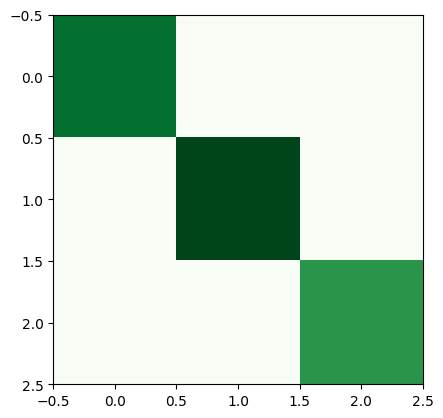

In [31]:
cm = confusion_matrix(y_test, predictions)
plt.imshow(cm, cmap=plt.cm.Greens)